In [140]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import wrangle
import env
import seaborn as sns
import acquire
import prep
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


import prep
import seaborn as sns
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
from statsmodels.formula.api import ols

In [219]:
#single family residence from zillow DB
df = prep.prep_df()

In [220]:
df.head().T

,0,1,2,3,4
bathrooms,2.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
bedrooms,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
sqft,3.633000e+03,1.620000e+03,2.077000e+03,1.244000e+03,1.300000e+03
tax_value,2.964250e+05,8.477700e+05,6.467600e+05,1.694710e+05,2.332660e+05
fips,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03
latitude,3.456002e+07,3.399620e+07,3.401298e+07,3.395356e+07,3.389713e+07
longitude,-1.181698e+08,-1.184380e+08,-1.184792e+08,-1.180839e+08,-1.181030e+08
lotsizesquarefeet,9.826000e+03,1.284275e+04,6.490000e+03,6.021000e+03,4.917000e+03
regionidcity,4.022700e+04,1.244700e+04,2.696400e+04,1.371600e+04,5.363600e+04
regionidcounty,3.101000e+03,3.101000e+03,3.101000e+03,3.101000e+03,3.101000e+03


In [222]:
train, test = train_test_split(df, train_size = .75, random_state = 123)
train['tax_per_sqft'] = train.tax_value/train.sqft
test['tax_per_sqft'] = test.tax_value/test.sqft

In [223]:
train.head(2)

,bathrooms,bedrooms,sqft,tax_value,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,logerror,tax_per_sqft
12854,2.0,3.0,1838.0,216159.0,6037.0,34613754.0,-118209598.0,9796.0,40227.0,3101.0,97329.0,1999.0,172934.0,0.051355,117.605550
6103,2.0,3.0,2306.0,181378.0,6037.0,33764859.0,-118414326.0,10306.0,33311.0,3101.0,96121.0,1968.0,109124.0,0.005659,78.654814


In [224]:
X_train = train.drop(columns=['logerror','fips','latitude','longitude','regionidcity','regionidcounty','regionidzip'])
y_train = train[['logerror']]
X_test = test.drop(columns=['logerror','fips','latitude','longitude','regionidcity','regionidcounty','regionidzip'])
y_test = test[['logerror']]
X_train.tax_value = X_train.tax_value /1000
X_train.structuretaxvaluedollarcnt = X_train.structuretaxvaluedollarcnt/1000


In [225]:
#adding a baseline yhat as mean of log error
train['mean_logerror'] = train.logerror.mean()
train['residual'] = train['logerror']- train['mean_logerror']

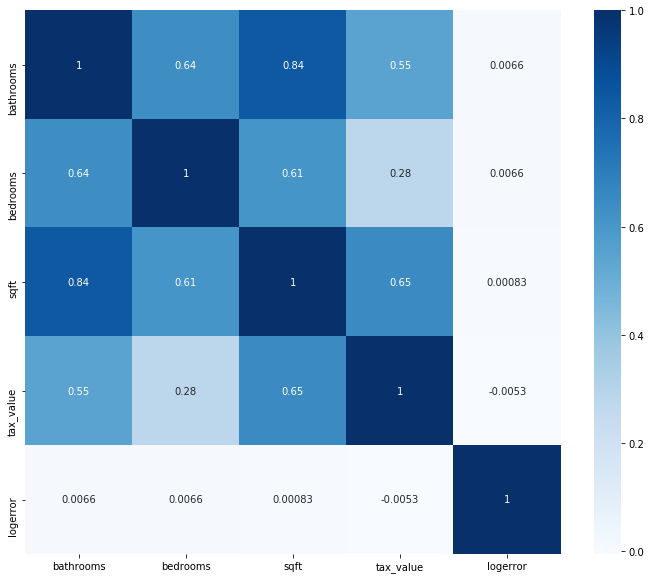

In [226]:
plt.figure(figsize=(12,10))
subset = train[['bathrooms','bedrooms','sqft','tax_value','logerror']]
cor = subset.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

In [227]:
# MSE of baseline
train['residual^2'] = train.residual ** 2
SSE = sum(train['residual^2'])
MSE = SSE/len(train)
print("MSE = ", MSE)

MSE =  0.028226598428296255


In [228]:
#MSE of sqft and bedrooms as x variables
x = train[['sqft','bedrooms']]
y = train[['logerror']]
ols_model = ols('y ~ x', data=train).fit()
train['yhat'] = ols_model.predict(x)
r2 = ols_model.rsquared
print('r squared = ',round(r2,7))

r squared =  5.88e-05


In [229]:

train['residual^2'] = train.residual ** 2
SSE = sum(train['residual^2'])
MSE = SSE/len(train)
print("MSE = ", MSE)

MSE =  0.028226598428296255


In [230]:
#Clustered by logerror
train = target_cluster(y_train,X_train)

In [231]:
train.groupby('cluster').mean().sort_values(by='logerror')

,bathrooms,bedrooms,sqft,tax_value,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,tax_per_sqft,logerror
cluster,,,,,,,,,
0,2.246101,3.307139,1861.576104,454.714035,10005.093945,1960.977059,176.426342,232.251601,-0.007564
1,2.281556,3.325333,1894.887556,462.203628,10036.023672,1960.898222,188.416226,228.970173,0.322445
2,2.236000,3.344000,1786.544000,381.285104,7486.172565,1958.768000,148.855376,220.134419,1.842071


In [232]:
#Model1 performs very slightly better than the baseline
baseline = mean_squared_error(train.logerror,train.mean_logerror)
model1 = mean_squared_error(train.logerror,train.yhat)
print("Baseline: ",baseline)
print("Model1: ",model1)
baseline<model1

AttributeError: 'DataFrame' object has no attribute 'mean_logerror'

   k          sse
0  1  3751.911837
1  2   897.075588
2  3   505.189168
3  4   340.287732
4  5   252.072017
5  6   198.233074
6  7   145.947344
7  8   112.997069
8  9    88.101579


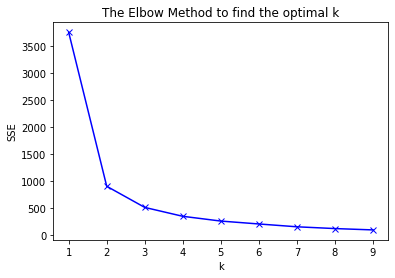

In [233]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(y_train)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [234]:
def target_cluster(y_train,X_train):
    kmeans =KMeans(n_clusters=3)
    kmeans.fit(y_train)
    y_train['cluster'] = kmeans.predict(y_train)
    train = X_train.merge(y_train,left_index=True,right_index=True)
    return train

In [120]:
train.cluster.value_counts()

0    35088
1     3952
2     1868
Name: cluster, dtype: int64

In [88]:
train.groupby('cluster').logerror.mean()

cluster
0    0.367101
1    0.015527
2    1.860403
3   -1.206134
4   -0.162711
Name: logerror, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [91]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',min_samples_leaf=3,n_estimators=100,max_depth=3, random_state=123)

In [96]:
X = train[['bathrooms','sqft','bedrooms']]
y = train.cluster
X = train[['bathrooms','sqft','bedrooms']]
y = train.cluster

In [97]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [98]:
print(rf.feature_importances_)

[0.29597126 0.51010841 0.19392034]


In [110]:
y_pred = pd.DataFrame(rf.predict(X))
y_pred_proba = rf.predict_proba(X)

In [100]:
rf.score(X,y)

0.8577295394543855

In [102]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1746
           1       0.86      1.00      0.92     35088
           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00      3851

    accuracy                           0.86     40908
   macro avg       0.17      0.20      0.18     40908
weighted avg       0.74      0.86      0.79     40908



In [235]:
def x_cluster(X_train,X_test):
    
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X_train)
    X_train['x_cluster'] = kmeans.predict(X_train)
    X_test['x_cluster'] = kmeans.predict(X_test)

    return X_train, X_test, kmeans



In [236]:
X_train = train[['tax_per_sqft','structuretaxvaluedollarcnt','lotsizesquarefeet']]
X_test = test[['tax_per_sqft','structuretaxvaluedollarcnt','lotsizesquarefeet']]

In [237]:
X_train, X_test, kmeans = x_cluster(X_train,X_test)

In [241]:
kmeans.cluster_centers_

array([[2.31656740e+02, 1.75350401e+02, 8.78295388e+03],
       [4.07255295e+02, 7.74711625e+02, 1.68733400e+06],
       [7.59337000e+02, 1.64180000e+01, 6.84566600e+06],
       [3.37989468e+02, 6.70700969e+02, 2.40946270e+05]])

   k           sse
0  1  8.613849e+13
1  2  3.282311e+13
2  3  1.612231e+13
3  4  9.880539e+12
4  5  5.261816e+12
5  6  3.508222e+12
6  7  2.148090e+12
7  8  1.379083e+12
8  9  8.840040e+11


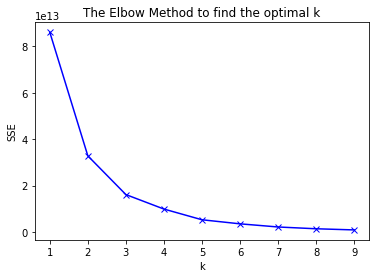

In [139]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['tax_per_sqft_y','structuretaxvaluedollarcnt_y','lotsizesquarefeet_y']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [182]:
train = x_cluster(train[['tax_per_sqft','structuretaxvaluedollarcnt','lotsizesquarefeet']],train)

In [183]:
train.head()

,bathrooms,bedrooms,sqft,tax_value,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,tax_per_sqft,logerror,cluster,mean_logerror,residual,residual^2,yhat,x_cluster
12854,2.0,3.0,1838.0,216.159,9796.0,1999.0,172.934,117.605550,0.051355,0,0.016239,0.035115,0.001233,0.015716,0
6103,2.0,3.0,2306.0,181.378,10306.0,1968.0,109.124,78.654814,0.005659,0,0.016239,-0.010581,0.000112,0.015307,0
46884,2.0,3.0,1482.0,304.562,6461.0,1924.0,196.565,205.507422,0.052020,0,0.016239,0.035781,0.001280,0.016028,0
33177,3.0,4.0,1548.0,220.704,7113.0,1954.0,122.037,142.573643,0.093799,0,0.016239,0.077560,0.006016,0.017738,0
43799,2.0,3.0,1338.0,354.795,5998.0,1950.0,89.675,265.168161,-0.066423,0,0.016239,-0.082662,0.006833,0.016154,0


In [208]:
X_train = train[['tax_per_sqft','structuretaxvaluedollarcnt','lotsizesquarefeet','x_cluster']]

In [247]:
X_train.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [210]:
X_train.x_cluster.value_counts()

0    40619
3      280
1        8
2        1
Name: x_cluster, dtype: int64

In [250]:
X_train = X_train.x_cluster

0    0
Name: x_cluster, dtype: int32